# Tugas 5

Nama: Fretty Novelyna Ramadhani
NPM : 23083010005
Kelas: A083 Analisis Data Eksploratif

## Deskripsi Kasus

Titanic dataset merupakan kumpulan informasi tentang penumpang titanic yang tenggelam setelah menabrak gunung es pada 15 April 1912. Dataset ini memiliki tujuan untuk memprediksi apakah seorang penumpang selamat atau tidak. 

1. PassengerId: ID unik untuk penumpang
2. Survived: Apakah penumpang selamat atau tidak (0=Tidakselamat, 1= Selamat)
3. Pclass: Kelas tiket penumpang (1=kelas 1, 2=kelas 2,3=kelas 3)
4. Name: Nama penumpang
5. Sex: Menunjukkan jenis kelamin penumpang ("Male" untuk laki-laki atau "Female" untuk perempuan)
6. Age: Umur penumpang
7. SibSp: Sibling Spouse merupakan jumlah saudara atau pasangan yang ada didalam kapal
8. PArch: Jumlah orang tua atau anak yang ada didalam kapla
9. Ticket: Nomor tiket penumpang
10. Fare: Tarif yang dibayar penumpang
11. Cabin: Nomor kabin penumpang
12. Embarked: Pelabuhan penumpang naik ke kapal (C= Cherbourg, Q= Queenstown, S=Southamton)

## visualisasi data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

df = pd.read_csv("D:/KULIAH/SEMESTER 3/EDA/Titanic Dataset.csv", sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,345.0,0,0,330911,78292.0,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,96875.0,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,86625.0,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,122875.0,NaN,S


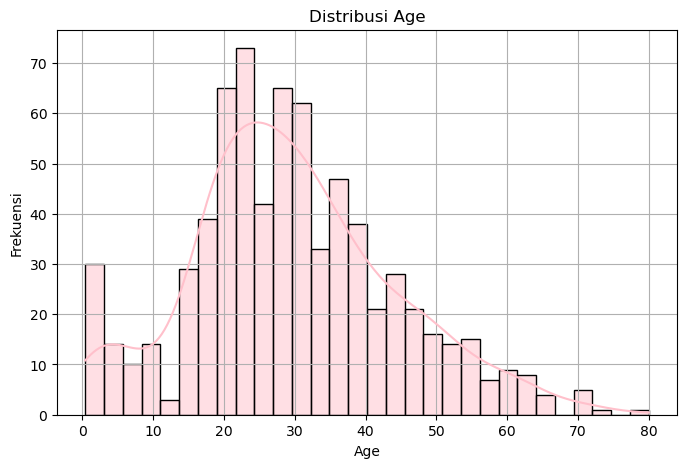

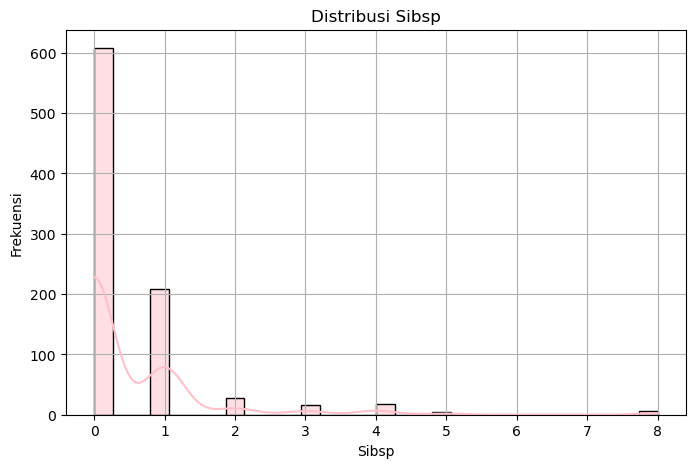

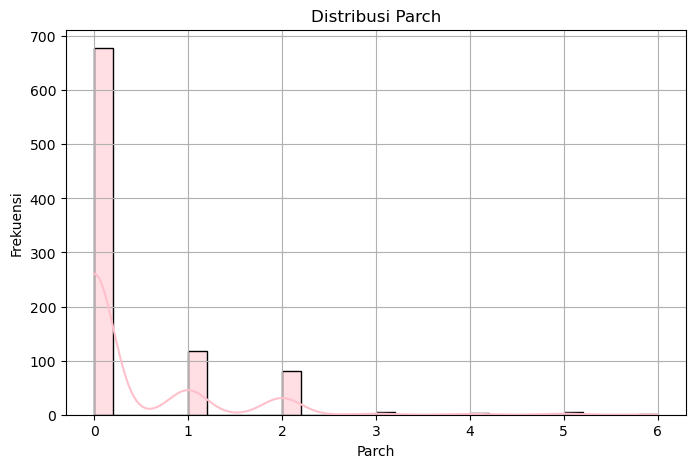

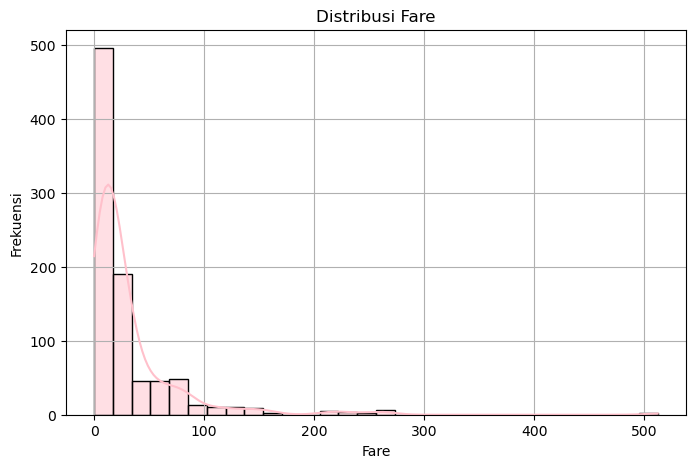

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
columns = ['age', 'sibsp', 'parch', 'fare']

for column in columns:
    plt.figure(figsize=(8, 5))
    
    sns.histplot(titanic[column].dropna(), kde=True, bins=30, color='pink')
    plt.title(f'Distribusi {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()


Untuk Age, SibSp, Parch dan fare yang mana merupakan data numerik dikategorikan sebagai distribusi skewed right karena dalam visualisasi ditas menunjukkan bahwa terdapat lebih banyak nilai rendah dan lebih sedikit nilai tingginya

Untuk data yang rasio

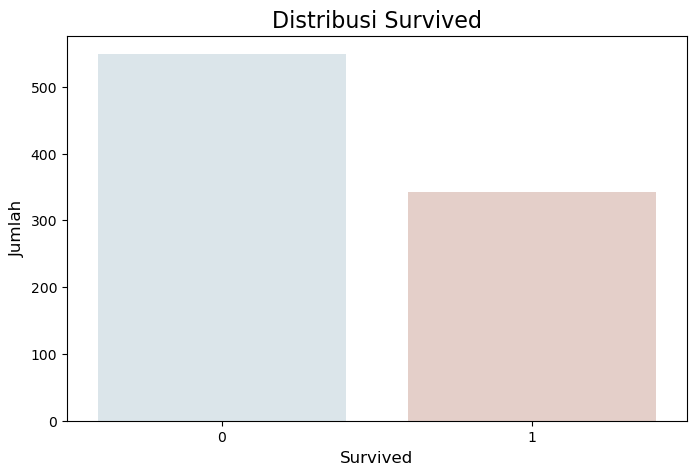

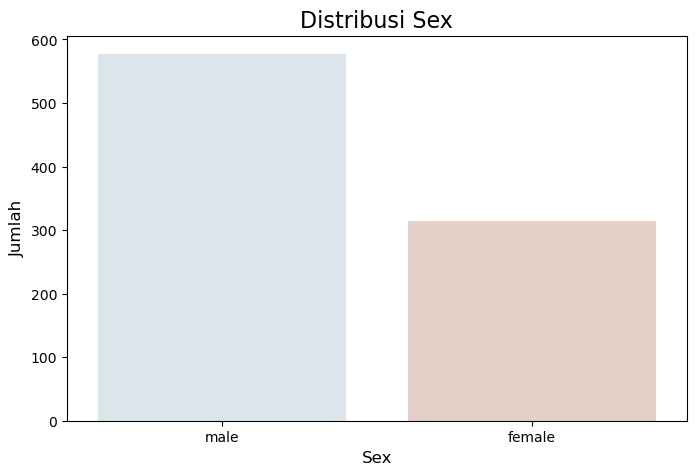

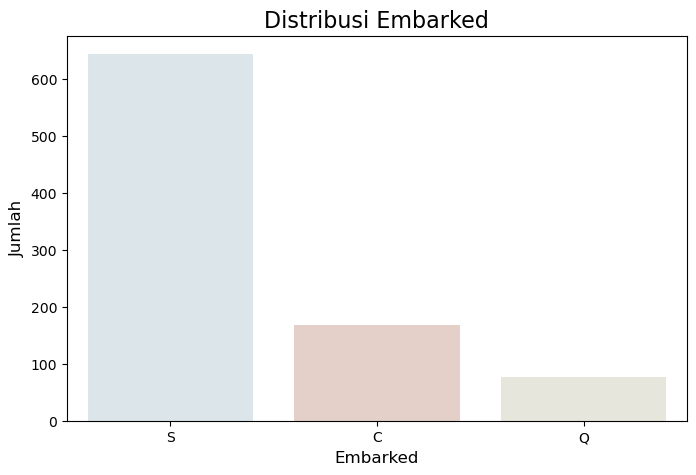

In [4]:
categorical_columns = ['survived', 'sex', 'embarked']

custom_palette = ['#D9E6EC', '#E9CCC4', '#E7E7DB']  

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    
    sns.countplot(x=titanic[column], order=titanic[column].value_counts().index, palette=custom_palette)
    plt.title(f'Distribusi {column.capitalize()}', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    
    plt.show()


Survived, Sex dan Embarked yang merupakan variabel nominal(kategorikal). Untuk survived merupakan Distribusi bernoulli karena Survived memiliki 2 kemungkinan hasil(0=tidak selamat, 1=selamat). Lalu untuk sex dan juga embarked merupakan distribusi kategorikal, yang mana sex memang memiliki 2 kategori yaitu female dan male namun kategori itu tidak memiliki urutan atau probabilitas terdefinisi untuk dimasukkan kedalam distribusi bernoulli, lalu untuk embarked ia memiliki 3 kategori(C, Q dan S) dimana ini tidak mengikuti distribusi probabilitas tertentu

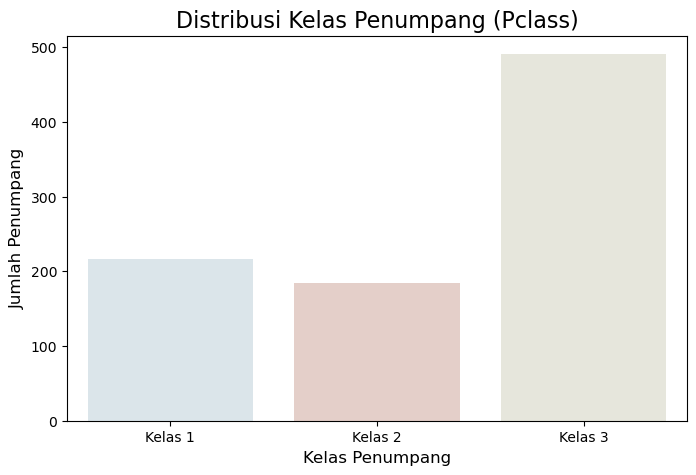

In [5]:
plt.figure(figsize=(8, 5))
custom_palette = ['#D9E6EC', '#E9CCC4', '#E7E7DB']  

sns.countplot(x='pclass', data=titanic, palette=custom_palette)
plt.title('Distribusi Kelas Penumpang (Pclass)', fontsize=16)
plt.xlabel('Kelas Penumpang', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.xticks([0, 1, 2], ['Kelas 1', 'Kelas 2', 'Kelas 3'])

plt.show()


Pclass merupakan variabel ordinal yang mana ia termasuk kedalam distribusi kategorikal ordinal karena ada lebih dari 2 kategori yang memiliki urutan

## Melakukan pemusatan

In [6]:
df.columns = df.columns.str.strip()
kolom = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Survived']

hasil = []

for perhitungan in kolom:
    mean = df[perhitungan].mean()
    median = df[perhitungan].median()
    modus = df[perhitungan].mode()[0]  
    
    hasil.append({
        'Faktor Pengaruh': perhitungan,
        'Mean': mean,
        'Median': median,
        'Modus': modus
    })

hasil_df = pd.DataFrame(hasil)

print(hasil_df)


  Faktor Pengaruh           Mean  Median  Modus
0          Pclass       2.265550     3.0    3.0
1           SibSp       0.447368     0.0    0.0
2           Parch       0.392344     0.0    0.0
3            Fare  138583.467626  2655.0  775.0
4             Age      42.945783    29.0   21.0
5        Survived       0.363636     0.0    0.0


Dari perhitungan diatas ini memberikan gambaran karakteristik penumpang titanic(tipe kelas, jumlah saudara/pasangan,orangtua/anak, tarif yang dibayar, usia, status kelangsungan hidup dan juga usia, usia. Dapat dilihat bahwa Pclass yang paling banyak adalah kelas 3, SibSp dilihat dari moudus menunjukkan bahwa banyak penumpang tidak membawa saudara/pasangan, lalu parch dilihat dari modus menunjukkan bahwa banyak penumpang yang tidak membawa orangtua/anak, Fare dilihat dari modus menunjukkan bahwa banyak tarif penumpang paling banyak adalah 775, untuk usia paling banyak adalah 21 tahun, untuk survived banyak penumpang yang tidak selamat dan untuk jenis kelamin menunjukkan bahwa lebih banyak penumpang adalah laki-laki

## Penyebaran data

In [7]:
df.columns = df.columns.str.strip()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
kolom = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Survived']

hasil = []

for perhitungan in kolom:
    rentang = df[perhitungan].max() - df[perhitungan].min()
    varians = df[perhitungan].var()
    deviasi_standar = df[perhitungan].std()
    kuartil_1 = df[perhitungan].quantile(0.25)
    kuartil_3 = df[perhitungan].quantile(0.75)
    iqr = kuartil_3 - kuartil_1  
    
    hasil.append({
        'Faktor Penyebaran': perhitungan,
        'Rentang': rentang,
        'Varians': varians,
        'Deviasi Standar': deviasi_standar,
        'Kuartil 1': kuartil_1,
        'Kuartil 3': kuartil_3,
        'IQR': iqr
    })

hasil_df = pd.DataFrame(hasil)

print(hasil_df)


  Faktor Penyebaran    Rentang       Varians  Deviasi Standar  Kuartil 1  \
0            Pclass        2.0  7.086905e-01         0.841838        1.0   
1               Age      604.0  3.766831e+03        61.374513       22.0   
2              Fare  5123292.0  1.698655e+11    412147.458000      285.0   
3             SibSp        8.0  8.041777e-01         0.896760        0.0   
4             Parch        9.0  9.632026e-01         0.981429        0.0   
5          Survived        1.0  2.319599e-01         0.481622        0.0   

   Kuartil 3       IQR  
0       3.00      2.00  
1      42.25     20.25  
2   78958.00  78673.00  
3       1.00      1.00  
4       0.00      0.00  
5       1.00      1.00  


Dari perhitungan diatas menunjukkan bagaimana berbagai faktor seperti usia, tarif, dan jumlah orang yang dibawa oleh penumpang Titanic memiliki penyebaran data yang berbeda.Seperti Fare memiliki penyebaran yang sangat tinggi ddibandingkan dengan SibSp dan Parch yang menunjukkan bahwa variasi yang signifikan dalam tarif yang dibayarkan, sedangkan jumlah anggota keluarga yang dibawa cenderung lebih rendah.

## Analisis skewness 

In [8]:
from scipy.stats import skew

numeric_columns = titanic.select_dtypes(include=['float64', 'int64']).columns
skewness_values = titanic[numeric_columns].apply(lambda x: skew(x.dropna()))

print("Skewness dari setiap kolom numerik:")
print(skewness_values)

Skewness dari setiap kolom numerik:
survived    0.477717
pclass     -0.629486
age         0.388290
sibsp       3.689128
parch       2.744487
fare        4.779253
dtype: float64


Perhitungan diatas merupakan analisis skewnwss dari kolom numerik:
1. Survived memiliki nilai 0.4777 (positif) ini menunjukkan bahwa distribusi kolom ini sedikit miring ke kanan (right-skewed) yang artinya sedikit lebih banyak penumpang yang tidak selamat dibanding dengan penumpang yang selamat

2. Pclass memiliki nilai -0.6295 (negatif) ini menunjukkan bahwa distribusi kolom ini miring ke kiri (left-skewed) yang artinya lebih banyak penumpang yang berada di kelas 3 dari pada kelas 1 dan 2

3. Age memiliki nilai 0.3883 (positif) ini menunjukkan bahwa distribusi kolom ini edikit miring ke kanan yang artinya sebagian besar penumpang berada di kelompok usia yang lebih muda, namun terdapat juga beberapa penumpang yang lebih tua (long tail ke kanan)

4. SibSp memiliki nilai 3.6891 (positif) ini menunjukkan bahwa distribusi kolom ini sangat miring ke kanan yang artinya sebagian besar penumpang bepergian dengan sedikit atau tanpa saudara/pasangan, tetapi tetap ada beberapa penumpang dengan jumlah saudara/pasangan yang cukup tinggi (outlier)

5. Parch memiliki nilai 2.7445 (positif) ini menunjukkan bahwa distribusi kolom ini sangat miring ke kanan yang artinya sebagian besar penumpang tidak bepergian dengan orang tua/anak nya tetapi ada juga beberapa penumpang yang pergi dengan orang tua/anak  dalam jumlah yang lebih tinggi dari rata-rata.

6. Fare memiliki nilai yang sangat tinggi yaitu 4.7793 (positif) menunjukkan bahwa distribusi kolom ini sangat miring ke kanan yang artinya sebgian besar penumpang membayar tarif yang relatif rendah, namun ada juga beberapa penumpang yang membayar tarid sangat tinggi (outlier) sehingga menyebabkan distribusi miring ke kanan



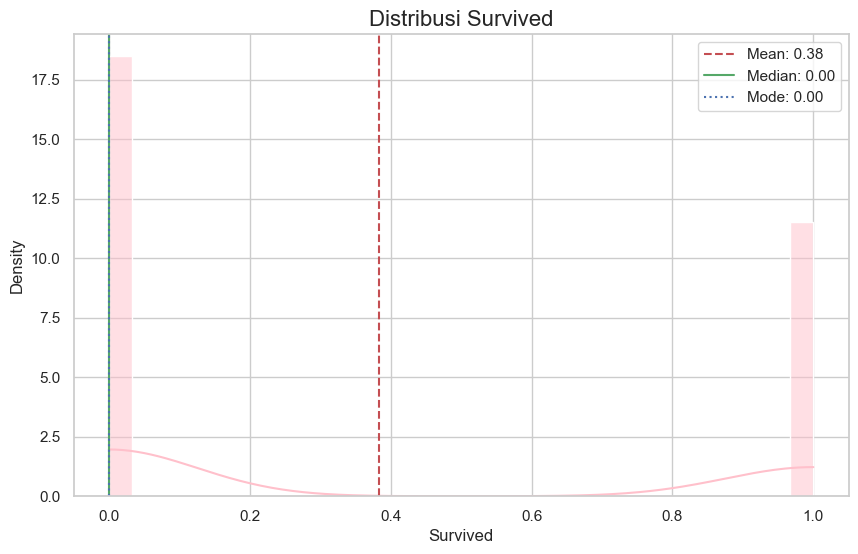

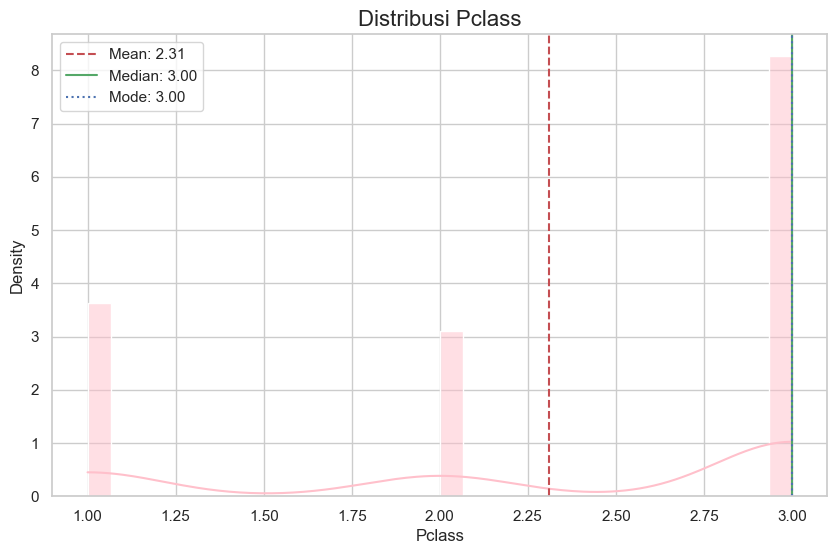

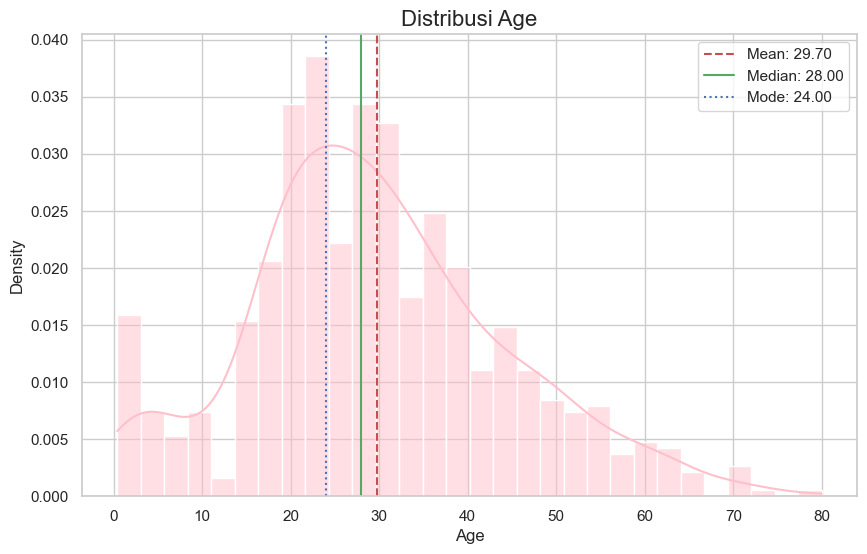

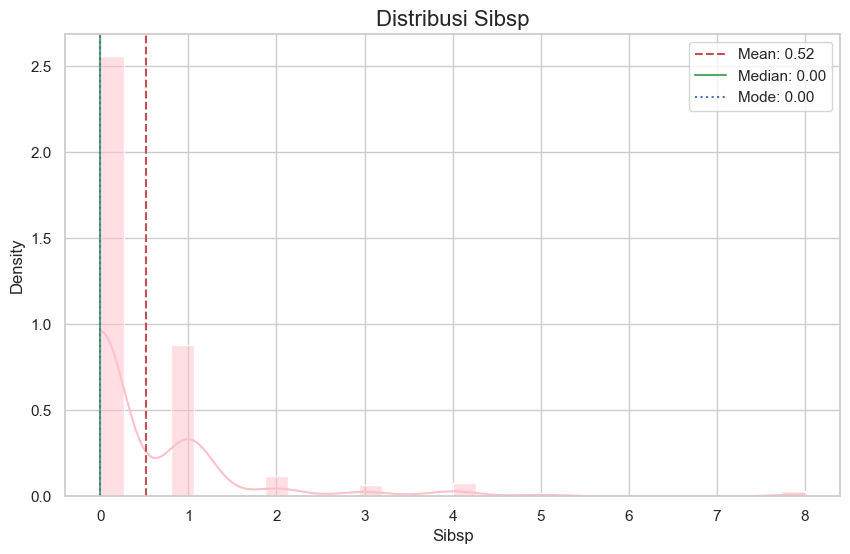

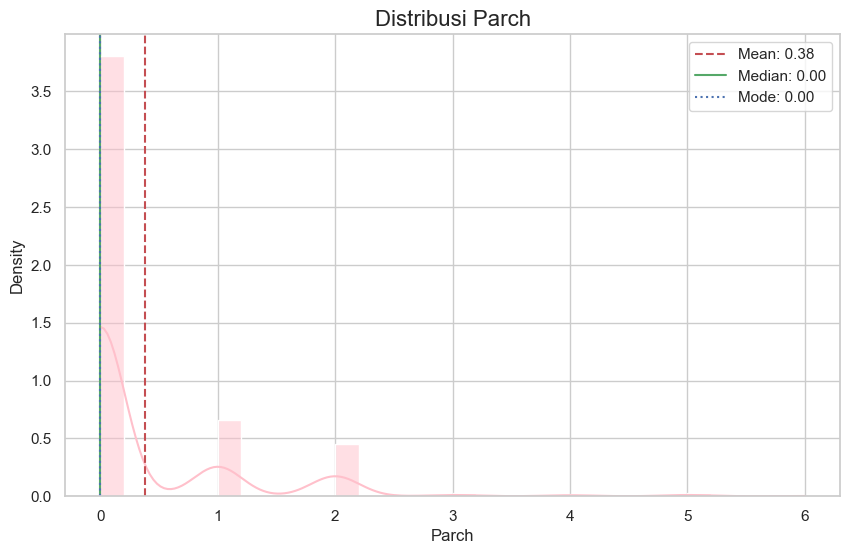

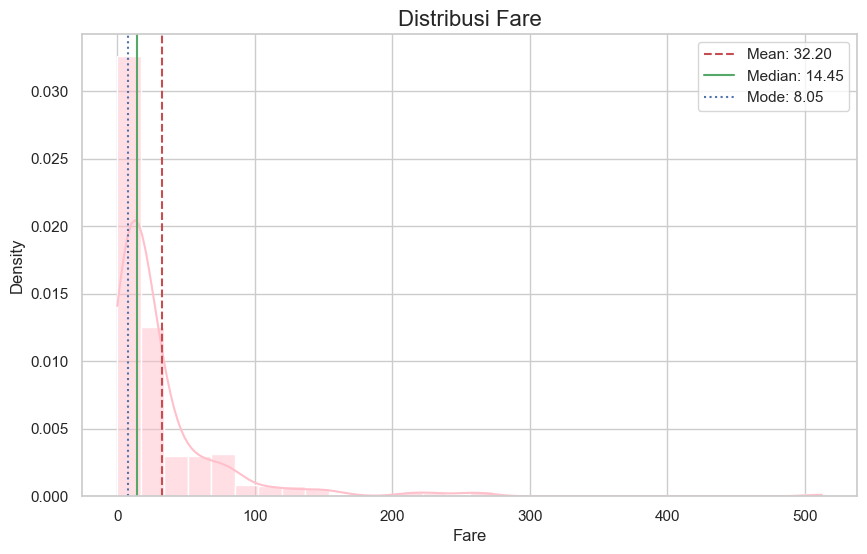

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats


numeric_columns = titanic.select_dtypes(include=['float64', 'int64']).columns
sns.set(style="whitegrid")

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(titanic[column].dropna(), kde=True, bins=30, color='pink', stat="density")

    mean = titanic[column].mean()
    median = titanic[column].median()
    mode = titanic[column].mode()[0]  

    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    plt.axvline(mode, color='b', linestyle=':', label=f'Mode: {mode:.2f}')

    plt.title(f'Distribusi {column.capitalize()}', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Density', fontsize=12)

    plt.legend()

    plt.grid(True)
    plt.show()
